## The Objectives are:

1. Sharpe Ratio 
2. Treynor Measure
3. The Alpha Jensen Measure
4. Timing Opportunity

# I: Sharpe Ratio

1. Let's start with building our dataset. First, we need some mutual funds: We are going to evaluate two mutual funds: Victory RS Global Fund and Fidelity Advisor Semiconductors Fund - Class A.  The data for these funds are in Yahoo Finance: Victory RS Global R (RGGKX) and Fidelity Advisor Semiconductors I (FELIX). The time period we want is from Feb 24, 2016 to Feb 02, 2017. Download the daily adjusted prices for these funds and compute the returns. The returns will be from Feb 25, 2016 to Feb 1, 2017. 

2. After getting the return data for these two funds, let's start doing the evaluation.  

3. We are going to start with Sharpe Ratio. It is computed as follows:
$$ Sharpe\_ Ratio = \frac{\bar{R}_{P}-R_{F}}{\sigma_{P}}  $$

4. You need to compute the average return and the standard deviation of each fund. Also, consider the daily risk free rate $ R_{F} $ to be 0.002\%. 

5. Compute the Sharpe Ratios for the funds. Which fund would you pick based on this measure and why?   

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as pdr
#import pandas_datareader is for fama french

In [2]:
df=yf.download("FELIX RGGKX", start="2016-02-24", end="2017-02-02")
df=df.iloc[:,:2]
df.columns = ['FELIX', 'RGGKX']
daily_ret = df[['FELIX', 'RGGKX']].pct_change()
daily_ret = daily_ret.iloc[1:,]
print(daily_ret)

[*********************100%%**********************]  2 of 2 completed

               FELIX     RGGKX
Date                          
2016-02-25  0.007294  0.011060
2016-02-26  0.009413 -0.003646
2016-02-29  0.001435 -0.005490
2016-03-01  0.030802  0.023919
2016-03-02  0.008339  0.005391
...              ...       ...
2017-01-26 -0.010130 -0.000710
2017-01-27  0.011696 -0.000710
2017-01-30 -0.009152 -0.007107
2017-01-31 -0.009723  0.000716
2017-02-01  0.007364  0.003577

[237 rows x 2 columns]


In [5]:
print(daily_ret.FELIX.std()*(252**0.5))

0.18943159439568846


In [6]:
print(daily_ret.RGGKX.std()*(252**0.5))

0.1369058217770265


In [3]:
rf=0.002/100
excess_FELIX = (daily_ret.FELIX.mean()-rf)*252
std_FELIX=daily_ret.FELIX.std()*(252**0.5)
SR_FELIX = excess_FELIX/std_FELIX
excess_RGGKX = (daily_ret.RGGKX.mean()-rf)*252
std_RGGKX=daily_ret.RGGKX.std()*(252**0.5)
SR_RGGKX = excess_RGGKX/std_RGGKX
print('Sharp ratio of Victory =' , SR_RGGKX)
print('Sharp ratio of Fidelity =' , SR_FELIX)

Sharp ratio of Victory = 2.7827652780926555
Sharp ratio of Fidelity = 2.366661348871949


In [11]:
                                  ###Interpretation###
#Victory has a higher Sharpe Ratio of 2.78 compared to Fidelity's 2.37.
#A higher Sharpe Ratio generally indicates better risk-adjusted returns.
#It means that Victory is likely to provide a greater return per unit of risk taken compared to Fidelity.
##It's important to note that Sharpe Ratio is just one measure of investment performance##
##Also other factors should also be considered before making investment decisions##

# II: Treynor Measure

1. The Treynor measure is computed as follows: $$Treynor\_ Ratio = \frac{\bar{R}_{P} -R_{F}}{\beta}$$     

2. We already have the expected return ($ \bar{R}_{P} $) and the fixed risk-free rate ($ R_{F} $) equal to 0.002\%. 

3. Let's estimate beta for each fund with the regression as follows: $$R_{Pt} -R_{Ft} =\alpha + \beta(R_{Mt} -R_{Ft}) + e_{Pt} $$ You need data on $ R_{Ft} $ and factors (Excess Market return, SMB and HML). Get these data from the Kenneth French website: http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html for the above dates. Do not forget to divide them by 100 (You can follow the steps in Lab3). 

4. To estimate the regression, you need to use package *statsmodels.api* and *sm.OLS* function to do the OLS analysis.(as we did in the Lab III). **Note: We use the series of risk-free rates ($ R_{FT} $ from Ken French website) in estimating the betas. However, when estimating the Treynor measure, we can use a fixed risk-free rate as $ R_{F} $.**

5.  After estimating the betas and the Treynor ratio for each fund. Which fund would you pick based on this measure and why? 

In [4]:
ff = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3_daily',start=2016, end=2018)[0]
# the [0] is because the imported obect is a dictionary, 
# and key=0 is the first dataframe that contains the data we need


ff.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
ff = ff/100
ff = ff.join(daily_ret,how='inner')

# convert to excess returns in prep for regressions
for stock in ['RGGKX', 'FELIX']:    
    ff[stock+'_excess'] = ff[stock] - ff['RF']

print(ff)

C:\Users\Hadi\AppData\Local\Temp\ipykernel_11676\518863710.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3_daily',start=2016, end=2018)[0]


            mkt_excess     SMB     HML     RMW     CMA       RF     FELIX  \
Date                                                                        
2016-02-25      0.0110 -0.0044  0.0023 -0.0007 -0.0024  0.00001  0.007294   
2016-02-26     -0.0001  0.0086  0.0029 -0.0056 -0.0004  0.00001  0.009413   
2016-02-29     -0.0069  0.0072  0.0025  0.0013  0.0053  0.00001  0.001435   
2016-03-01      0.0234 -0.0065  0.0039 -0.0058 -0.0061  0.00001  0.030802   
2016-03-02      0.0054  0.0060  0.0068 -0.0070 -0.0007  0.00001  0.008339   
...                ...     ...     ...     ...     ...      ...       ...   
2017-01-26     -0.0010 -0.0058  0.0041 -0.0008 -0.0016  0.00002 -0.010130   
2017-01-27     -0.0012 -0.0006 -0.0068  0.0010  0.0005  0.00002  0.011696   
2017-01-30     -0.0068 -0.0074 -0.0046  0.0060 -0.0015  0.00002 -0.009152   
2017-01-31      0.0000  0.0081 -0.0056 -0.0039 -0.0025  0.00002 -0.009723   
2017-02-01      0.0003 -0.0008  0.0004  0.0022 -0.0022  0.00002  0.007364   

In [6]:
y=ff.FELIX_excess
x=ff.mkt_excess
res_FELIX = sm.OLS(y, sm.add_constant(x)).fit()
print(res_FELIX.summary())

                            OLS Regression Results                            
Dep. Variable:           FELIX_excess   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     375.2
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.33e-50
Time:                        21:11:47   Log-Likelihood:                 826.84
No. Observations:                 237   AIC:                            -1650.
Df Residuals:                     235   BIC:                            -1643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.214      0.2

In [7]:
Beta = res_FELIX.params[1]
print('Beta of Fidelity  =', Beta)

Beta of Fidelity  = 1.3259370700421362


In [ ]:
                                  ###Interpretation###
#The model is well-specified.
#The adjusted R^2 is of an acceptable size, considering that the model is a uni-variate model.
#The Durbin-Watson statistic also shows that there is no autocorrelation in the model.
#The t-statistic and p-value indicate that the Beta is well-estimated  significant at the 99% confidence level.
#The Beta value is 1.33, which indicates that this asset has more systematic risk than the market.
#This means that this stock will react more strongly, both positively and negatively, to changes in market returns.
#This type of asset is recommended for times when the overall market is expected to have an upward trend.

In [8]:
y=ff.RGGKX_excess
x=ff.mkt_excess
res_RGGKX = sm.OLS(y, sm.add_constant(x)).fit()
print(res_RGGKX.summary())

                            OLS Regression Results                            
Dep. Variable:           RGGKX_excess   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     383.2
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           2.90e-51
Time:                        21:12:15   Log-Likelihood:                 905.33
No. Observations:                 237   AIC:                            -1807.
Df Residuals:                     235   BIC:                            -1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.868      0.0

In [9]:
Beta = res_RGGKX.params[1]
print('Beta of victory  =', Beta)

Beta of victory  = 0.9621439656685487


In [ ]:
                                  ###Interpretation###
#The model is well-specified.
#The adjusted R^2 is of an acceptable size, considering that the model is a uni-variate model.
#The Durbin-Watson statistic slightly shows that there is no autocorrelation in the model.
#The t-statistic and p-value indicate that the Beta is well-estimated  significant at the 99% confidence level.
#The Beta value is .97, which indicates that this asset has less or equal systematic risk in comparison with market.
#This means that this stock will react similarly, both positively and negatively, to changes in market returns.
#This type of asset is recommended for times when the overall market is expected to have an stable range of fluctuations.

In [10]:
treynor_RGGKX = (daily_ret['RGGKX'].mean()-rf)*252/res_RGGKX.params[1]
print('Treynor ratio of Victory =', treynor_RGGKX)
treynor_FELIX = (daily_ret['FELIX'].mean()-rf)*252/res_FELIX.params[1]
print('Treynor ratio of Fidelity =', treynor_FELIX)

Treynor ratio of Victory = 0.3959667693189455
Treynor ratio of Fidelity = 0.33811626500763986


In [44]:
                                  ###Interpretation###
#Based on the Treynor Ratio, Victory appears to be a better choice for risk-adjusted returns compared to the market.
#The Treynor ratio of Victory (0.396) is higher than that of Fidelity (0.338)
#Indicating Victory potentially offers a higher return per unit of risk taken relative to the market.

# III: Jensen measure (or Jensen's alpha)

1. The Jensen measure (alpha $\alpha_{P}$) is estimated the constant in the following regression
$$  R_{Pt}-R_{Ft}  = \alpha_{P} +  \beta_{P}(R_{Mt}-R_{Ft}) + e_{Pt} $$     

2. You have estimated this regression in previous section. What is the alpha value for each fund? What do they mean? And based on the alpha (Jensen measure), which fund would you pick?

In [11]:
x=ff[['mkt_excess', 'SMB','HML']]
y=ff.RGGKX_excess
res_RGGKX=sm.OLS(y, sm.add_constant(x)).fit()
print(res_RGGKX.summary())

                            OLS Regression Results                            
Dep. Variable:           RGGKX_excess   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           3.17e-49
Time:                        21:13:35   Log-Likelihood:                 906.62
No. Observations:                 237   AIC:                            -1805.
Df Residuals:                     233   BIC:                            -1791.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.817      0.0

In [12]:
Alpha = res_RGGKX.params[0]
print('Alpha of victory  =', Alpha)

Alpha of victory  = 0.0006364708483561244


In [ ]:
                                  ###Interpretation###
#The model is well-specified.
#The adjusted R^2 is not of an acceptable size, considering that the model has been changed to a multi-variate model.
#The Durbin-Watson statistic slightly shows that there is no autocorrelation in the model.
#The t-statistic and p-value for intercept indicate that the Alpha is not well-estimated
#significant level is the 93% it means almost 90%.
#The Alpha value is .00064, which indicates that this asset has greater return in comparison with to Rf as risk free rate.

In [14]:
x=ff[['mkt_excess', 'SMB','HML']]
y=ff.FELIX_excess
res_FELIX=sm.OLS(y, sm.add_constant(x)).fit()
print(res_FELIX.summary())

                            OLS Regression Results                            
Dep. Variable:           FELIX_excess   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           5.40e-50
Time:                        21:13:57   Log-Likelihood:                 831.46
No. Observations:                 237   AIC:                            -1655.
Df Residuals:                     233   BIC:                            -1641.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.307      0.1

In [15]:
Alpha = res_FELIX.params[0]
print('Alpha of Fidelity  =', Alpha)

Alpha of Fidelity  = 0.0006289415106662784


In [ ]:
                                  ###Interpretation###
#The model is well-specified.
#The adjusted R^2 is not of an acceptable size, considering that the model has been changed to a multi-variate model.
#The Durbin-Watson statistic slightly shows that there is no autocorrelation in the model.
#The t-statistic and p-value for intercept indicate that the Alpha is not well-estimated.
#significant level is the 81% it means that statistically is not valid estimated coefficient.
#The Alpha value is .00063, which indicates that this asset has greater return in comparison with to Rf as risk free rate.

In [16]:
print('Risk Free Rate  =', 0.0002)
print('Alpha of victory  =', 0.00064)
print('Alpha of Fidelity  =', 0.00063)

Risk Free Rate  = 0.0002
Alpha of victory  = 0.00064
Alpha of Fidelity  = 0.00063


In [68]:
                                  ###Interpretation###
#Both Victory and Fidelity seem to have positive Jensen's Alphas
#With Victory having a slightly higher alpha of 0.00064 compared to Fidelity's 0.00063.
#A positive Jensen's Alpha indicates that historically, these funds have outperformed the risk free rate.
#In simpler terms, they've delivered returns above what would be predicted by just the overall market movement.

In [18]:
import pandas as pd

# Indexes
ratios = ["Sharpe Ratio", "Treynor Ratio", "Jensen's Alpha"]

# Assets
stocks = {
    "Victory": [2.78, 0.396, 0.00064],
    "Fidelity": [2.38, 0.338, 0.00063]
}

# Make DataFrame
df = pd.DataFrame(stocks, index=ratios)

# Styling the DataFrame
styled_df = df.style.background_gradient(cmap="Reds", axis=None, subset=None)

# Display the styled DataFrame
styled_df

,Victory,Fidelity
Sharpe Ratio,2.780000,2.380000
Treynor Ratio,0.396000,0.338000
Jensen's Alpha,0.000640,0.000630


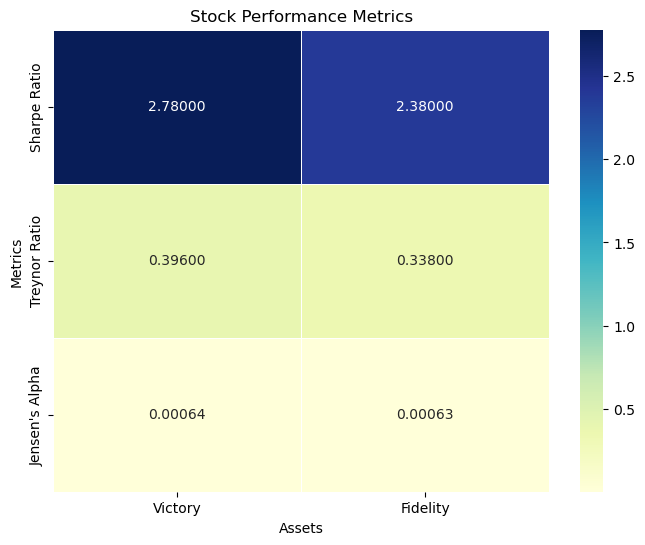

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Indexes
ratios = ["Sharpe Ratio", "Treynor Ratio", "Jensen's Alpha"]

# Assets
stocks = {
    "Victory": [2.78, 0.396, 0.00064],
    "Fidelity": [2.38, 0.338, 0.00063]
}

# Make DataFrame
df = pd.DataFrame(stocks, index=ratios)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".5f", linewidths=.5)
plt.title("Stock Performance Metrics")
plt.xlabel("Assets")
plt.ylabel("Metrics")
plt.show()

In [26]:
victory_better = True

from IPython.display import Markdown, display

# Define the output message with HTML styling
if victory_better:
    message = "<strong style='color: green;'>\"Victory\" stock is better than \"Fidelity\" stock.</strong>"
else:
    message = "<strong style='color: red;'>\"Fidelity\" stock is better than \"Victory\" stock.</strong>"

# Display the output message
display(Markdown(message))

<strong style='color: green;'>"Victory" stock is better than "Fidelity" stock.</strong>

# IV: Timing

We are going to see whether there is market timing in these two funds.

1. In order to check for market timing, we are going to estimate the following regression: $$(R_{it}-R_{Ft}) = a_{i} + b_{i}(R_{mt}-R_{Ft}) + c_{i}(R_{mt}-R_{Ft})^{2} + e_{it}  $$     

2. We already have $ (R_{mt}-R_{Ft}) $. Let's calculate $ (R_{mt}-R_{Ft})^{2} $. You need to calculate the square value of Mkt-Rf in a new column.  

3. The next step is to run the regression and find out the values of $ b_{i} $ and $ c_{i} $ for each fund and discuss whether there is any market timing ability in each fund (Pay attention to the p-values of the estimates to find whether the values are significant or not). 

In [27]:
ff['mkt_exsq'] = (ff['mkt_excess'])**2
x=ff[['mkt_excess', 'mkt_exsq']]
                     
y=ff.RGGKX_excess
res_RGGKX = sm.OLS(y,sm.add_constant(x)).fit()
print(res_RGGKX.summary())

                            OLS Regression Results                            
Dep. Variable:           RGGKX_excess   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           6.53e-52
Time:                        21:20:20   Log-Likelihood:                 910.09
No. Observations:                 237   AIC:                            -1814.
Df Residuals:                     234   BIC:                            -1804.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.973      0.0

In [ ]:
                                  ###Interpretation###
#The model is well-specified.
#The adjusted R^2 is of an acceptable size, considering that the model has been changed to a multi-variate model.
#The Durbin-Watson statistic slightly shows that there is no autocorrelation in the model.
#The t-statistic and p-value for all estimated coefficient indicate that the significant level is the 99%.

In [28]:
ff['mkt_exsq'] = (ff['mkt_excess'])**2
x=ff[['mkt_excess', 'mkt_exsq']]

y=ff.FELIX_excess
res_FELIX = sm.OLS(y,sm.add_constant(x)).fit()
print(res_FELIX.summary())

                            OLS Regression Results                            
Dep. Variable:           FELIX_excess   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           8.65e-50
Time:                        21:20:33   Log-Likelihood:                 828.18
No. Observations:                 237   AIC:                            -1650.
Df Residuals:                     234   BIC:                            -1640.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.765      0.0

In [ ]:
                                  ###Interpretation###
#The model is well-specified.
#The adjusted R^2 is of an acceptable size, considering that the model has been changed to a multi-variate model.
#The Durbin-Watson statistic slightly shows that there is no autocorrelation in the model.
#The t-statistic and p-value for market excess shows that the estimation is well-defined and significant level is the 99%.
#The t-statistic and p-value for intercept and (market excess)^2 shows that the significant level is almost 90%.

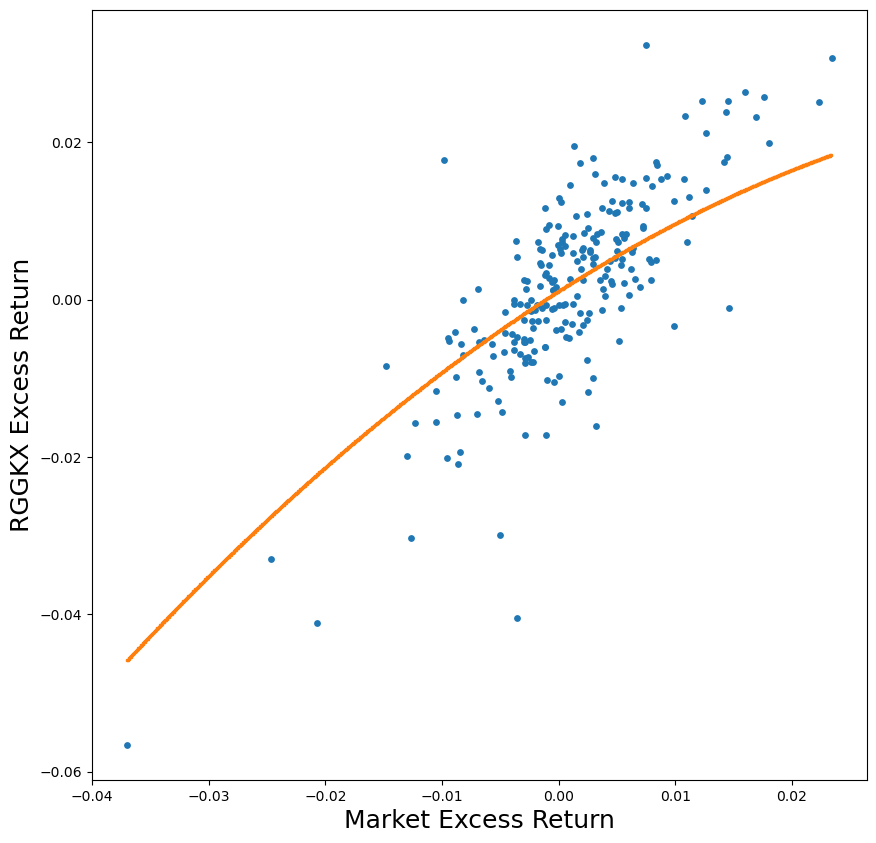

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `res_RGGKX` contains the results of your regression
coef = np.array(res_RGGKX.params)

# Corrected the spelling of `np.arange`
x_bar = np.arange(x.mkt_excess.min(), x.mkt_excess.max(),
                  (x.mkt_excess.max()-x.mkt_excess.min())/1000)

# Corrected the variable name typo from `x-bar` to `x_bar`
y1_pred = coef[0] + coef[1]*x_bar + coef[2]*(x_bar**2)

plt.subplots(figsize=[10, 10])

# Corrected the function name from `plt.xlable` to `plt.xlabel`
plt.xlabel('Market Excess Return', fontsize=18)
plt.ylabel('RGGKX Excess Return', fontsize=18)

# Corrected the variable name typo from `y` to `y1_pred`
plt.scatter(x.mkt_excess, y, marker='o', s=15, alpha=1)
plt.scatter(x_bar, y1_pred, marker='x', s=3)
plt.show()

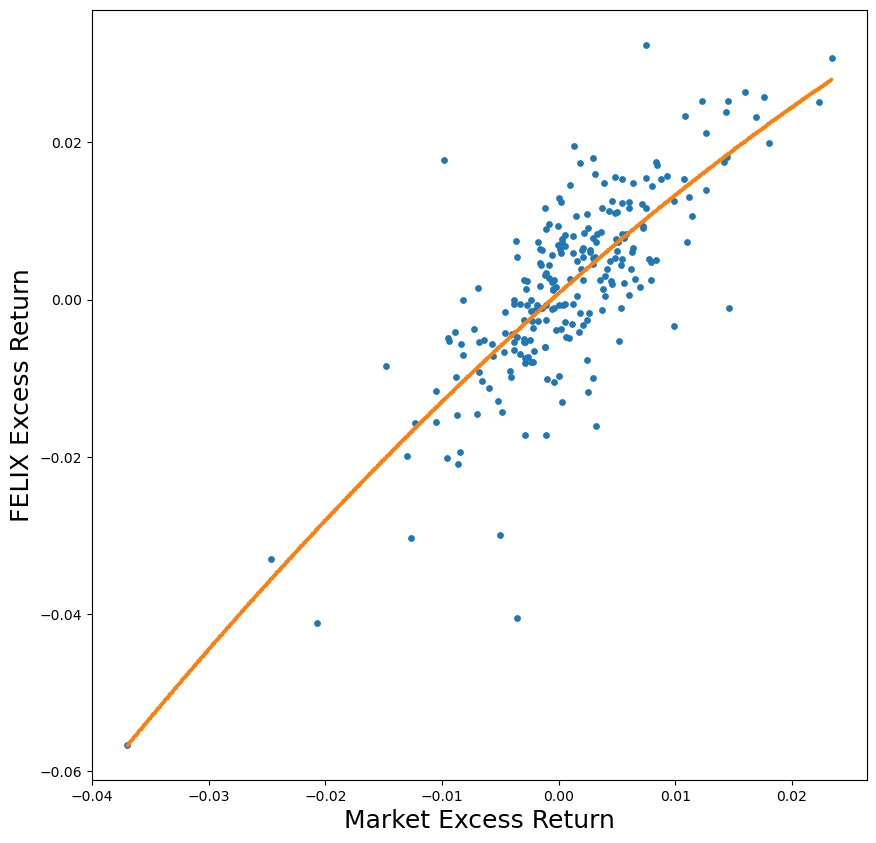

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `res_FELIX` contains the results of your regression
coef = np.array(res_FELIX.params)

# Corrected the spelling of `np.arange`
x_bar = np.arange(x.mkt_excess.min(), x.mkt_excess.max(),
                  (x.mkt_excess.max()-x.mkt_excess.min())/1000)

# Corrected the variable name typo from `x-bar` to `x_bar`
y1_pred = coef[0] + coef[1]*x_bar + coef[2]*(x_bar**2)

plt.subplots(figsize=[10, 10])

# Corrected the function name from `plt.xlable` to `plt.xlabel`
plt.xlabel('Market Excess Return', fontsize=18)
plt.ylabel('FELIX Excess Return', fontsize=18)

# Corrected the variable name typo from `y` to `y1_pred`
plt.scatter(x.mkt_excess, y, marker='o', s=15, alpha=1)
plt.scatter(x_bar, y1_pred, marker='x', s=3)
plt.show()

In [ ]:
#Given the obtained shapes which resemble an inverted parabola, and according to the timing theory...
#the market conditions are not favorable for borrowing and investing in risky assets.
#Financial managers should be aware that they should opt for less risky assets in this situation.
#Those chart indicates that the market is currently in a downward phase.
#This phase can be caused by factors such as economic recession, rising interest rates, or political tensions.
#This theory suggests that investing in risky assets, such as high-risk stocks...
#can be less profitable during a downward market phase.
#In such circumstances, investors should consider shifting towards less risky assets, such as bonds and gold.

## End